Unterstehend die erstellung von allen möglichen Optionen wie

In [2]:
from database.insert import *
from database.models import *
from database.functions import *
from database.session import session
from simulation.functions import *
import pandas as pd
import numpy as np
from tqdm import tqdm

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:


g10 = ['EUR', 'JPY', 'CHF', 'GBP', 'AUD', 'CAD', 'NZD', 'NOK', 'SEK', 'USD']


model = 'OLS'
version = 1

for cur in tqdm(g10):

    base = cur
    portfolio_name = 'portfolio' + base
    portfolio_name_fx = 'portfolioFX' + base



    # Get Data
    data = get_portfolio_data(portfolio_name,base)
    asset_logreturns = data[0]
    currency_list = data[1]
    fx_logreturns = data[2]
    fwd_logreturns = data[3]
    weights = data[4]
    df_hedge = data[5]
    factors = data[6]

    # Predict hedge Ratios
    predict = ols(currency_list,
                      df_hedge,
                      factors,
                      duration =1)
    hedge_ratios = predict[0]


    # Simulate Portfolio
    df_fx = simulate_portfolio(asset_logreturns,
                            currency_list,
                            fx_logreturns,
                            fwd_logreturns,
                            weights,
                            hedge_ratios,
                            start = '2005-10-31',
                            end = '2024-12-31',
                            fx_portfolio = True)

    df_asset = simulate_portfolio(asset_logreturns,
                            currency_list,
                            fx_logreturns,
                            fwd_logreturns,
                            weights,
                            hedge_ratios,
                            start = '2010-07-31',
                            end = '2024-12-31',
                            fx_portfolio = False)



    # save into DB
    insert_simulation(portfolio_name,model,version = version,df=df_asset)
    insert_simulation(portfolio_name_fx,model,version = version,df=df_fx)



 10%|█         | 1/10 [00:11<01:42, 11.41s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 20%|██        | 2/10 [00:22<01:31, 11.38s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 30%|███       | 3/10 [00:34<01:19, 11.36s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 40%|████      | 4/10 [00:45<01:07, 11.23s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 230 new SIMULATION_TS records.


 50%|█████     | 5/10 [00:56<00:56, 11.22s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 60%|██████    | 6/10 [01:07<00:44, 11.20s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 70%|███████   | 7/10 [01:18<00:33, 11.21s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 80%|████████  | 8/10 [01:29<00:22, 11.20s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


 90%|█████████ | 9/10 [01:41<00:11, 11.27s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


100%|██████████| 10/10 [01:51<00:00, 11.18s/it]

Inserted 174 new SIMULATION_TS records.
Inserted 231 new SIMULATION_TS records.


            hedged_growth
date                     
2005-11-30       1.000000
2005-12-31       1.004512
2006-01-31       1.004402
2006-02-28       1.010279
2006-03-31       1.011175
...                   ...
2024-08-31       1.190379
2024-09-30       1.191719
2024-10-31       1.192228
2024-11-30       1.189083
2024-12-31       1.186945

[230 rows x 1 columns]
            hedged_growth
date                     
2005-11-30       1.000000
2005-12-31       1.004003
2006-01-31       1.002794
2006-02-28       1.007945
2006-03-31       1.011253
...                   ...
2024-08-31       1.171228
2024-09-30       1.172010
2024-10-31       1.174604
2024-11-30       1.172560
2024-12-31       1.171964

[230 rows x 1 columns]
            hedged_growth
date                     
2005-11-30       1.000000
2005-12-31       1.002614
2006-01-31       1.004346
2006-02-28       1.010049
2006-03-31       1.010575
...                   ...
2024-08-31       1.168559
2024-09-30       1.168456
2024-10-31      

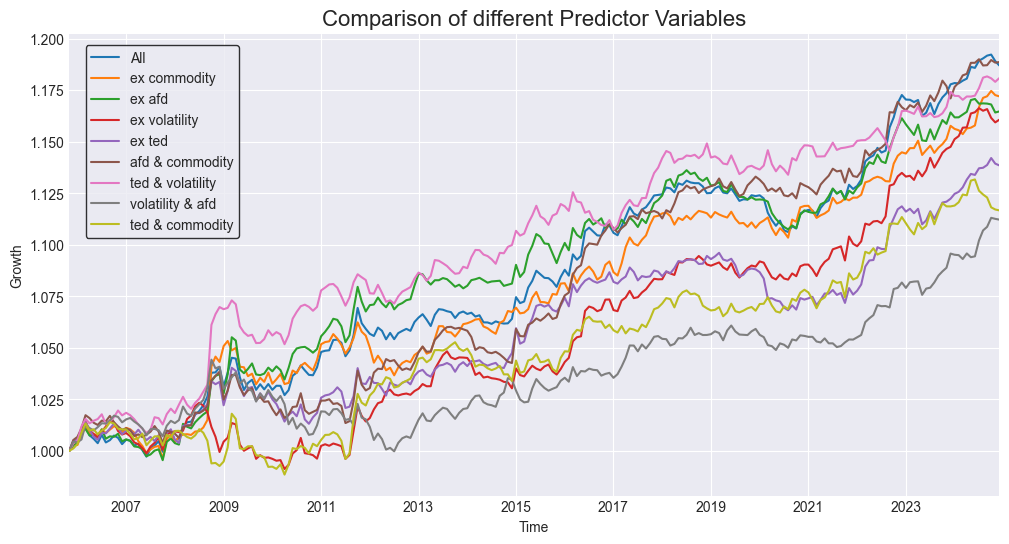

In [19]:
name = 'XGBOOST'
version = 18


df_total = pd.DataFrame()


liste = [
    ['All'],['ex commodity'],['ex afd'],['ex volatility'],['ex ted'],
    [ 'afd & commodity'],
    ['ted & volatility'],
    [ 'volatility & afd'],
    ['ted & commodity']
]
index = 0
for r in range(10,19):
    version = r

    df = get_simulation(portfolio_name='portfolioFXUSD',hedge_name=name,version = version)


    g10 = ['EUR', 'JPY', 'CHF', 'GBP', 'AUD', 'CAD', 'NZD', 'NOK', 'SEK']


    for x in g10:


        current = get_simulation(portfolio_name='portfolioFX'+x,hedge_name=name,version = version)
        df = df + current

    df = df.dropna()
    df = df / df.iloc[0]


    str = liste[index][0]

    df_total[str] = df[['hedged_growth']]
    print(df[['hedged_growth']])
    index = index + 1






plot_simulation(df_total,title = 'Comparison of different Predictor Variables',save = True)

In [11]:
str

['ted & commodity']